<a href="https://colab.research.google.com/github/Tiamiyu1/HDSC/blob/main/2.%20Stage%20B/%202.%20Machine_Learning_Regression_Predicting_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head(2)  

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.7900,19.79,44.73,19.0,45.566667,17.166667,55.2,7.026667,84.256667,17.2,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.7225,19.79,44.79,19.0,45.992500,17.166667,55.2,6.833333,84.063333,17.2,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [5]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

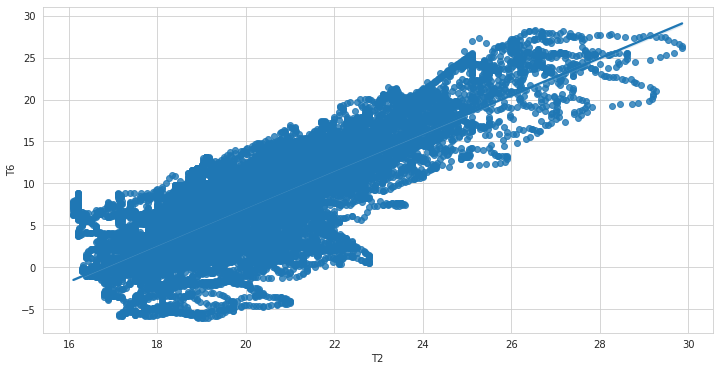

In [6]:
plt.figure(figsize=(12,6))

sns.regplot('T2', 'T6', data=df)

## Question 12


From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.T2, df.T6,
test_size=0.3, random_state=42)


from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train.values.reshape(-1, 1), y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test.values.reshape(-1, 1))

#R-Squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print('R^2 Score is: ', round(r2_score, 2)) # to 2 decimal place


R^2 Score is:  0.64


## Question 13

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:


What is the Mean Absolute Error (in two decimal places)?

In [8]:
#Mean Absolute Error (MAE)
#Firstly, we normalise our dataset to a common scale using the min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dff = df.drop(columns=['date', 'lights'])
normalised_df = pd.DataFrame(scaler.fit_transform(dff), columns=dff.columns)
features_df = normalised_df.drop(columns=['Appliances'])
target = normalised_df['Appliances']

#Now, we split our dataset into the training and testing dataset. Recall that we
#had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, target,
test_size=0.3, random_state=42)


from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

#fit the model to the training dataset
linear_model.fit(x_train, y_train)

#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print('The Mean Absolute Error (MAE)  is: ',round(mae, 3)) # to 2 decimal place

The Mean Absolute Error (MAE)  is:  0.05


## Question 14

What is the Residual Sum of Squares (in two decimal places)?

In [9]:
#residual sum of squares
residual_sum = np.sum(np.square(y_test - predicted_values))
print('The Residual Sum of Squares  is: ',round(residual_sum, 2)) # to 2 decimal place

The Residual Sum of Squares  is:  45.35


## Question 15


What is the Root Mean Squared Error (in three decimal places)?

In [10]:
#Root Mean Squared Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print('The Root Mean Squared Error  is: ',round(rmse, 3)) # to 3 decimal place

The Root Mean Squared Error  is:  0.088


## Question 16


What is the Coefficient of Determination (in two decimal places)?

In [11]:
#R-Squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print('The Coefficient of Determination (R^2 Score) is: ', round(r2_score, 2)) # to 2 decimal place

The Coefficient of Determination (R^2 Score) is:  0.15


## Question 17

Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [12]:
def get_weights_df(model, feat, col_name):
#this function returns the weight of every feature
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df



linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
linear_model_weights.sort_values(by='Linear_Model_Weight', ascending=False)

,Features,Linear_Model_Weight
25,RH_1,0.553547
24,T3,0.290627
23,T6,0.236425
22,Tdewpoint,0.117758
21,T8,0.101995
20,RH_3,0.096048
19,RH_6,0.038049
18,Windspeed,0.029183
17,T4,0.028981
16,RH_4,0.026386


## Question 18


Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [13]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.4)
ridge.fit(x_train, y_train)

Ridge(alpha=0.4)

In [14]:
ridge_pred = ridge.predict(x_test)

#root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
print('The root mean squared error (rmse) is: ', round(rmse, 3)) # to 3 decimal place

The root mean squared error (rmse) is:  0.088


# There is no difference with the ridge





## Question 19


Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [15]:
#Feature Selection and Lasso Regression
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001)
lasso.fit(x_train, y_train)

Lasso(alpha=0.001)

In [16]:
lasso_weights_df = get_weights_df(lasso, x_train, 'Lasso_weight')
lasso_weights_df

,Features,Lasso_weight
0,RH_out,-0.049557
1,RH_8,-0.000110
2,T1,0.000000
3,Tdewpoint,0.000000
4,Visibility,0.000000
5,Press_mm_hg,-0.000000
6,T_out,0.000000
7,RH_9,-0.000000
8,T9,-0.000000
9,T8,0.000000


There are 4 non zero values

## Question 20


What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [17]:
lasso_pred = lasso.predict(x_test)

#root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
print('The root mean squared error (rmse) is: ', round(rmse, 3)) # to 3 decimal place

The root mean squared error (rmse) is:  0.094
